# Calssification:

## Example 1:
Digital payments are evolving, but so are cyber criminals.

According to the Data Breach Index, more than 5 million records are being stolen on a daily basis, a concerning statistic that shows - fraud is still very common both for Card-Present and Card-not Present type of payments.

In today’s digital world where trillions of Card transaction happens per day, detection of fraud is challenging.

This Dataset sourced by some unnamed institute.

Feature Explanation:

distancefromhome - the distance from home where the transaction happened.

distancefromlast_transaction - the distance from last transaction happened.

ratiotomedianpurchaseprice - Ratio of purchased price transaction to median purchase price.

repeat_retailer - Is the transaction happened from same retailer.

used_chip - Is the transaction through chip (credit card).

usedpinnumber - Is the transaction happened by using PIN number.

online_order - Is the transaction an online order.

fraud - Is the transaction fraudulent.

https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud

In [1]:
import numpy as np
import pandas as pd
import random

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score ,confusion_matrix

In [2]:
data = pd.read_csv('../DATA/card_transdata.csv')

In [3]:
data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [5]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


# visualization

Percentage of fraud id equal to 8.7403 %


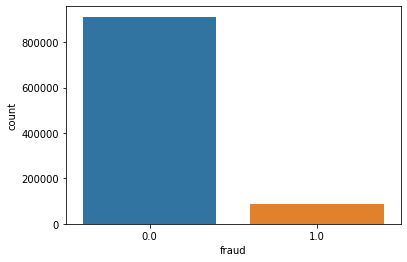

In [6]:
print('Percentage of fraud id equal to {} %'.format(100*data[data['fraud'] == 1].shape[0]/data.shape[0]))
sns.countplot(x='fraud', data=data);

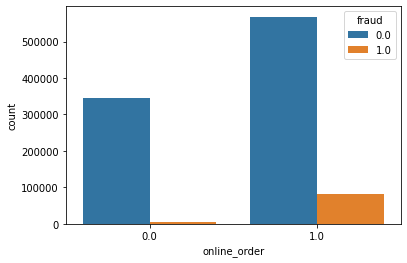

In [8]:
sns.countplot(x='online_order', data=data, hue='fraud');

In [7]:
fraud_data = data[data['fraud'] == 1]

In [8]:
N = fraud_data.shape[0]
online_fraud_percent = fraud_data[fraud_data['online_order'] == 1].shape[0]/N * 100
used_pin_number_percent = fraud_data[fraud_data['used_pin_number'] == 1].shape[0]/N * 100
repeat_retailer_percent = fraud_data[fraud_data['repeat_retailer'] == 1].shape[0]/N * 100
used_chip_percent = fraud_data[fraud_data['used_chip'] == 1].shape[0]/N * 100

In [9]:
online_fraud_percent, used_pin_number_percent, repeat_retailer_percent, used_chip_percent

(94.63176321178906, 0.31234625813759254, 88.0118531400524, 25.639852178986995)

<AxesSubplot:xlabel='ratio_to_median_purchase_price', ylabel='Count'>

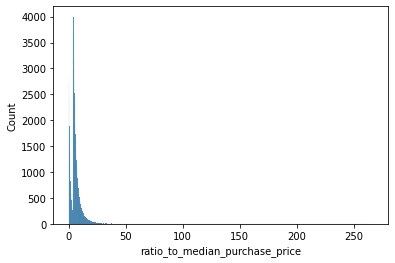

In [12]:
sns.histplot(x='ratio_to_median_purchase_price', data=fraud_data)

<AxesSubplot:xlabel='ratio_to_median_purchase_price', ylabel='Count'>

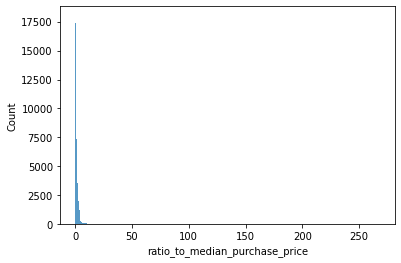

In [13]:
sns.histplot(x='ratio_to_median_purchase_price', data=data[data['fraud']!=1])

In [10]:
corr = data.corr()

corr

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
non_fraud = data.loc[data['fraud']==0, :].iloc[random.sample(range(912597), fraud_data.shape[0])]
df = pd.concat([non_fraud, fraud_data]).reset_index(drop=True)

X = df.drop(columns=['fraud'])
y = df['fraud']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((104883, 7), (69923, 7), (104883,), (69923,))

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [16]:
X = data.drop(columns=["fraud"])
y= data["fraud"]

In [17]:
X.shape , y.shape 

((1000000, 7), (1000000,))

# DecisionTreeClassifier

In [18]:
from sklearn.tree import DecisionTreeClassifier as DTC

In [20]:
clf = DTC(criterion="gini")
clf.fit(X_train,y_train)
## so fast 


DecisionTreeClassifier()

In [21]:
y_pred = clf.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score ,confusion_matrix

In [28]:
acc = accuracy_score(y_test , y_pred)
print ("the {} is : {} ".format("accuracy_score",acc))

pre = precision_score(y_test , y_pred)
print ("the {} is : {} ".format("precision_score",pre))

rec = recall_score(y_test , y_pred)
print ("the {} is : {} ".format("recall_score",rec))

f1 = f1_score (y_test , y_pred)
print ("the {} is : {} ".format("f1_score ",f1))

the accuracy_score is : 0.9998998898788668 
the precision_score is : 0.999885697956851 
the recall_score is : 0.9999142710178888 
the f1_score  is : 0.9998999842832444 


In [42]:
confusion_matrix(y_test,y_pred)

array([[34927,     2],
       [    1, 34993]])

# RandomForestClassifier 

In [34]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [44]:
clf = RFC ( n_estimators=10,criterion="gini")
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)

In [45]:
acc = accuracy_score(y_test , y_pred)
print ("the {} is : {} ".format("accuracy_score",acc))

pre = precision_score(y_test , y_pred)
print ("the {} is : {} ".format("precision_score",pre))

rec = recall_score(y_test , y_pred)
print ("the {} is : {} ".format("recall_score",rec))

f1 = f1_score (y_test , y_pred)
print ("the {} is : {} ".format("f1_score ",f1))

the accuracy_score is : 0.9999713971082477 
the precision_score is : 0.9999428506114985 
the recall_score is : 1.0 
the f1_score  is : 0.9999714244892127 


In [46]:
confusion_matrix(y_test,y_pred)

array([[34927,     2],
       [    0, 34994]])